# THE SPARKS FOUNDATION 

# GRADUATE ROTATIONAL INTERNSHIP PROGRAM ( GRIP )


# Data Science & Business Analytics Intern

## Task 1 :

Prediction Using Supervised Machine Learning Technique.

To predict the percentage of an student based on the no. of study hours.

What will be predicted score if a student studies for 9.25 hrs/day ?

### Given Dataset :

[http://bit.ly/w-data](http://bit.ly/w-data)

## Author: Aishwarya Parulekar

### Step-1: Importing required libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step-2: Read Data using remote link

In [2]:
URL = "http://bit.ly/w-data"
studentdata = pd.read_csv(URL)
print("Data is imported successfully")

Data is imported successfully


In [3]:
studentdata.head(5)        # Observe the dataset.

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
studentdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Step-3: Visualizing the distribution of scores

Plotting data points on 2-D graph to find any relationship between the data.

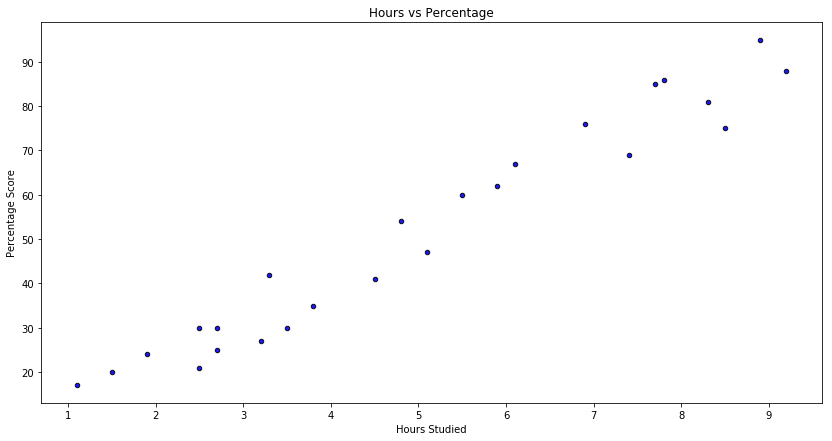

In [6]:
plt.rcParams["figure.figsize"] = [14, 7]
studentdata.plot(kind = 'scatter', x='Hours', y='Scores', alpha = 0.9, style='o', color = 'blue', edgecolor='black');  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

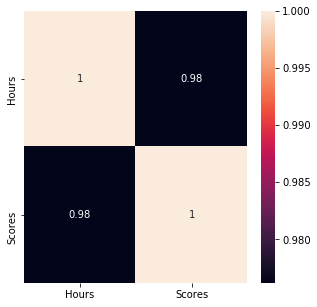

In [7]:
plt.figure(figsize=(5,5))
correlation_matrix = studentdata.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Hence, we see that there is a positive linear relation between the number of hours studied and percentage of score.

### Step-4: Preparing the Data

This step involved division of data into "attributes" (inputs) and "labels" (outputs).

In [8]:
# Using the iloc function we will divide the data.
X = studentdata.iloc[:, :-1].values  #input variable
y = studentdata.iloc[:, 1].values    #target variable

In [9]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

 ### Step-5: Splitting data into training and testing data

In [11]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### Step-6: Training the Algorithm

We have splitted the data into training and testing sets, now we will train our model

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


### Step-7: Plotting the Regression Line

After training the model, its time to visualize it...

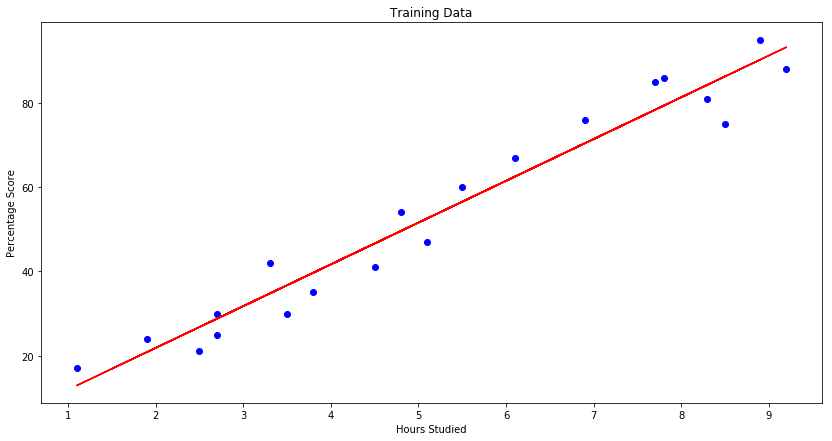

In [13]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the train data
plt.rcParams["figure.figsize"] = [14, 7]
plt.scatter(X_train, y_train, color='blue')
plt.plot(X, line, color='red');
plt.title('Training Data');
plt.xlabel('Hours Studied');
plt.ylabel('Percentage Score');
plt.show()

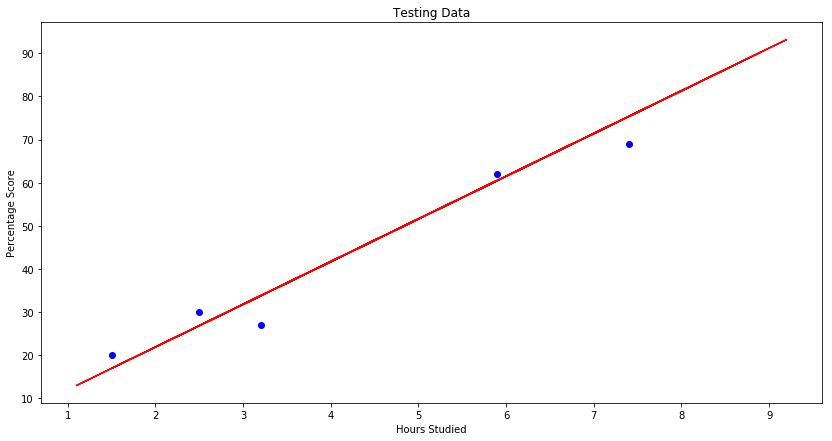

In [14]:
plt.rcParams["figure.figsize"] = [14, 7]
plt.scatter(X_test, y_test, color='blue')
plt.plot(X, line, color='red');
plt.title('Testing Data');
plt.xlabel('Hours Studied');
plt.ylabel('Percentage Score');
plt.show()

### Step-8: Making Prediction

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [17]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Step-9: Comparing Actual vs Predicted Score Values

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


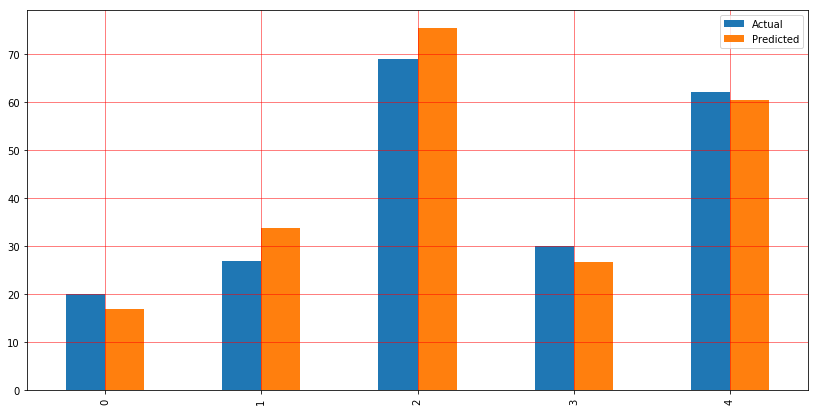

In [19]:
# Plotting the Bar graph to depict the difference between the actual and predicted value.
df.plot(kind = 'bar')
plt.grid(which = 'major', linewidth='0.5', color='red')
plt.grid(which = 'minor', linewidth='0.5', color='blue')
plt.show()

In [20]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Step-10: Evaluating the Model

In this step, we are evaluating our model with various error metrices.

In [21]:
# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# To find Mean Absolute Error(mse)
mse = (mean_absolute_error(y_test, y_pred))
print("MAE:",mse)

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE:",rmse)

# To find coefficient of determination
r2 =  r2_score(y_test, y_pred)
print("R-Square:",r2)

MAE: 4.183859899002975
RMSE: 4.6474476121003665
R-Square: 0.9454906892105356


### The accuracy of the model is 94.55%. The mean absolute error is 4.18%

### Conclusion

I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.

# Thank you 